In [81]:
import pandas as pd

df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [82]:
df = df.drop(["family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O","SCC", "FAF","TUE","CALC","MTRANS", "Gender", "Age"],axis = 1)

In [83]:
df

,Height,Weight,NObeyesdad
0,1.620000,64.000000,Normal_Weight
1,1.520000,56.000000,Normal_Weight
2,1.800000,77.000000,Normal_Weight
3,1.800000,87.000000,Overweight_Level_I
4,1.780000,89.800000,Overweight_Level_II
...,...,...,...
2106,1.710730,131.408528,Obesity_Type_III
2107,1.748584,133.742943,Obesity_Type_III
2108,1.752206,133.689352,Obesity_Type_III
2109,1.739450,133.346641,Obesity_Type_III


In [84]:
df = df.rename(columns= {"NObeyesdad": "Obese"})

In [85]:
df["Obese"] = df["Obese"].apply(lambda x: -1 if x == "Normal_Weight" or x == "Insufficient_Weight" else 1)

In [86]:
df

,Height,Weight,Obese
0,1.620000,64.000000,-1
1,1.520000,56.000000,-1
2,1.800000,77.000000,-1
3,1.800000,87.000000,1
4,1.780000,89.800000,1
...,...,...,...
2106,1.710730,131.408528,1
2107,1.748584,133.742943,1
2108,1.752206,133.689352,1
2109,1.739450,133.346641,1


50
50
100


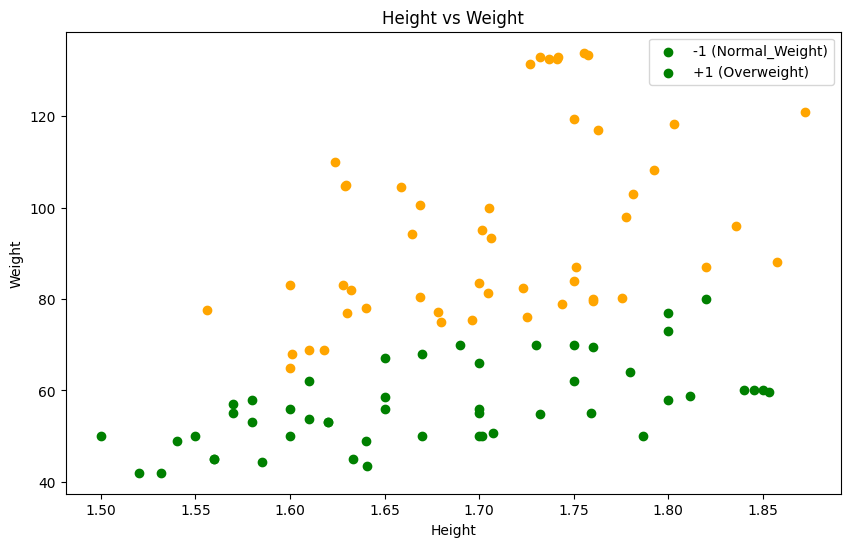

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data by Obese values
negative_one = df[df["Obese"] == -1]
positive_one = df[df["Obese"] == 1]

# Randomly select 50 data points from each group
sample_negative_one = negative_one.sample(50, random_state=42)
sample_positive_one = positive_one.sample(50, random_state=42)
print(len(sample_negative_one))
print(len(sample_positive_one))

# Combine the two samples into a new DataFrame
sample_df = pd.concat([sample_negative_one, sample_positive_one])
print(len(sample_df))
# Reset the index of the combined DataFrame
sample_df = sample_df.reset_index(drop=True)

# Plot the data
plt.figure(figsize=(10, 6))
for index, row in sample_df.iterrows():
    color = 'green' if row["Obese"] == -1 else 'orange'
    plt.scatter(row["Height"], row["Weight"], color=color, label='-1' if row["Obese"] == -1 else '+1')

# Label the axes
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.legend(['-1 (Normal_Weight)', '+1 (Overweight)'], loc='upper right')

plt.show()

Maximum iterations (250) reached


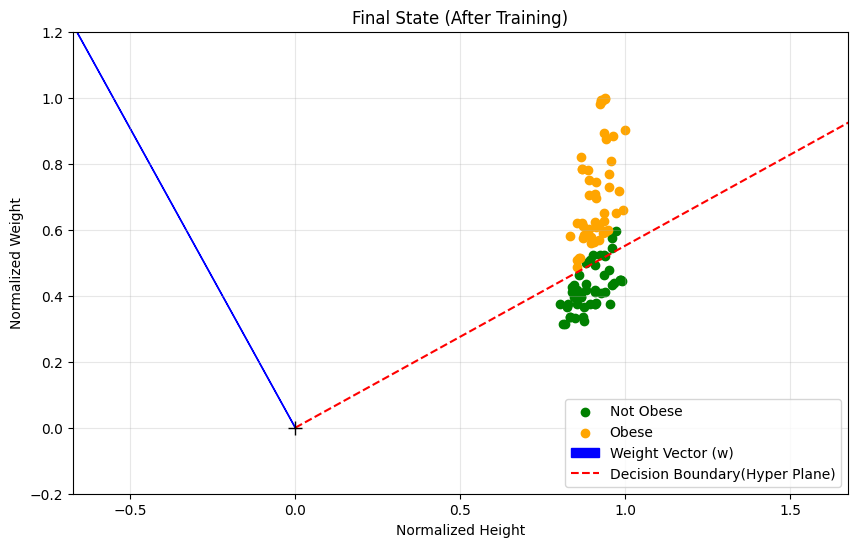


Final normalized weights: [-8.86338015 16.06493771]

Final accuracy: 91.00%


In [88]:
# Extract Height and Weight as X and convert to numpy.ndarray
X = sample_df[['Height', 'Weight']].to_numpy()

# Extract Obese as y and convert to numpy.ndarray
y = sample_df['Obese'].to_numpy()

# Step 1: Normalize the data
max_values = np.max(X, axis=0)
X_normalized = X / max_values

# Initialize weight vector
w = np.zeros(2)
max_iterations = 250
updates = 0

# Function to plot decision boundary
def plot_decision_boundary(X, y, w, title):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='green', label='Not Obese')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Obese')

    if not np.all(w == 0):
        # Plot the weight vector w
        plt.arrow(0, 0, w[0], w[1],
                 head_width=0.02, head_length=0.02,
                 fc='blue', ec='blue',
                 label='Weight Vector (w)')

        # Calculate the midpoint between the two classes
        midpoint = np.mean(X, axis=0)

        # Calculate perpendicular slope
        slope = -w[0]/w[1]

        x_points = np.linspace(0, 2, 10)
        y_points = slope * x_points

        plt.plot(x_points,y_points, 'r--', label='Decision Boundary(Hyper Plane)')

    plt.xlabel('Normalized Height')
    plt.ylabel('Normalized Weight')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Set proper axis limits to show data points clearly
    if title.startswith('Initial'):
        plt.xlim(140, 190)  # Adjust based on your actual height range
        plt.ylim(50, 140)   # Adjust based on your actual weight range
    else:
        # For other plots, keep the normalized scale
        plt.axis('equal')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)

    # Add the origin
    plt.plot(0, 0, 'k+', markersize=10)

    plt.show()

# Perceptron Training
for iteration in range(max_iterations):
    misclassified = 0

    for i in range(len(X_normalized)):
        # Step 2: Calculate y*w^T*x
        activation = y[i] * np.dot(w, X_normalized[i])

        # Step 3: Update weights if misclassified
        if activation <= 0:
            w +=  y[i] * X_normalized[i]
            misclassified += 1
            updates += 1

    # Step 4: Check if most points are correctly classified
    if misclassified == 0: # Setting the threshold to 2
        print(f"Converged after {iteration + 1} iterations with {updates} weight updates")
        break

    if iteration == max_iterations - 1:
        print(f"Maximum iterations ({max_iterations}) reached")

# Final plot
plot_decision_boundary(X_normalized, y, w, 'Final State (After Training)')

# Print final weights
print("\nFinal normalized weights:", w)

# Calculate accuracy
predictions = np.sign(np.dot(X_normalized, w))
accuracy = np.mean(predictions == y) * 100
print(f"\nFinal accuracy: {accuracy:.2f}%")

# Testing

In [89]:
# Randomly select 25 data points from each group
sample_negative_test = negative_one.sample(25, random_state=123)
sample_positive_test= positive_one.sample(25, random_state=123)

# Combine the two samples into a new DataFrame
sample_df_test = pd.concat([sample_negative_test, sample_positive_test])
# Reset the index of the combined DataFrame
sample_df_test = sample_df.reset_index(drop=True)

In [94]:
X_test = sample_df_test[['Height', 'Weight']].to_numpy()
y_test = sample_df_test['Obese'].to_numpy()

# Function to predict class for new data points
def predict(X_test, w, max_values):
    # Normalize the test data using the same max_values from training
    X_test_normalized = X_test / max_values

    # Make predictions
    predictions = np.sign(np.dot(X_test_normalized, w))
    return predictions


# Compare with true labels
accuracy = np.mean(predictions == y_test)
print(f"Accuracy : {accuracy*100} %")

Accuracy : 91.0 %
